In [10]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from math import pi as π
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import butter, bilinear, zpk2tf, cont2discrete

from astropy import units as u
from astropy.units import si,  def_unit
from freqandsee.freqandsee import Signal, LinearFilter, SignalBundle

from freqandsee.project_logger import logger

logger.info("freqandsee is loaded")

2025-03-22 19:57:35,325 gramb freqandsee[140136] INFO freqandsee is loaded


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
n = int(1e3)
fs = 100 * u.kHz
ts = 1 / fs
time = np.arange(0, n + 1) * ts
time_short = time[:100]
fc = 5 * u.kHz
wc = 2 * π * fc * u.rad
y = Signal(
    x=time_short,
    y=np.sin(wc * time_short) * u.volt,
    name="Aether sensor",
    x_name="t",
    y_name="Voltage",
)
y

Signal name: 'Aether sensor' V(kHz⁻¹). n=1.00e+02 sampling points, fs=100.0 kHz, RMS=7.07e-01 V.

<Axes: title={'center': 'Aether sensor'}, xlabel='t ($\\mathrm{ms}$)', ylabel='Voltage ($\\mathrm{V}$)'>

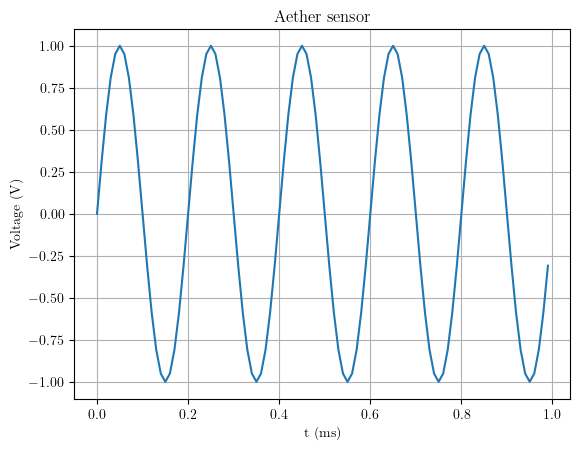

In [12]:
y.plot(x_display_unit=u.ms)

Implement a low-pass filter wiht a cutoff frequency of $5$ kHz.

<Axes: title={'center': 'Signal_7'}, xlabel='x(Signal_7) ($\\mathrm{kHz}$)', ylabel='y(Signal_7) $\\mathrm{}$'>

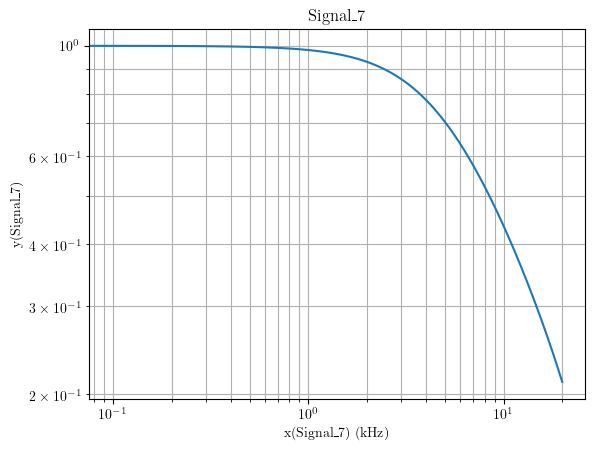

In [13]:
fc = 5e3  # cutoff frequency in Hz
tau = 1 / (2 * np.pi * fc)  # Time constant
b = [1]
a = [tau, 1]
system_d = cont2discrete((b, a), dt=1 / (fs.to_value(u.Hz)), method="bilinear")
bd, ad, _ = system_d

h = LinearFilter(b=bd[0], a=ad, name="Linear filter")
H = h.frequency_response(fs=fs)
# omit displaying too close to the sampling frequency
max_freq_display = int(
    np.ceil((fs / 5) / H.xs).to_value(u.dimensionless_unscaled)
)
H[:max_freq_display].plot()

Filter the signal $y$ by the filter $h$, check the rms value of the filtered signal and plot the filtered signal togehter with the original one.

In [14]:
z = y * h
z

Signal name: 'Aether sensor * Linear filter' V(kHz⁻¹). n=1.00e+02 sampling points, fs=100.0 kHz, RMS=5.00e-01 V.

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Signal bundle'}, xlabel='Time () ($\\mathrm{ms}$)', ylabel='Voltage ($\\mathrm{V}$)'>)

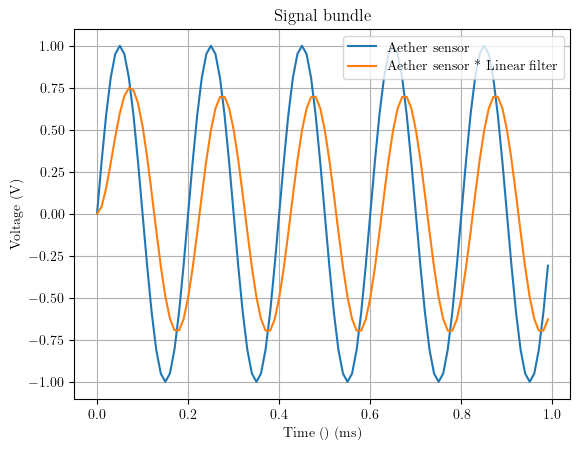

In [15]:
sb = SignalBundle(signals=[y, z], name="Signal bundle")
sb.plot(
    x_display_unit=u.ms,
    y_display_unit=u.volt,
    x_label="Time ()",
    y_label="Voltage",
    suptitle="Signal bundle",
    grid=True,
)

(<Figure size 1200x1000 with 2 Axes>,
 <Axes: title={'center': 'Aether sensor * Linear filter'}, xlabel='x(Aether sensor * Linear filter)', ylabel='y(Aether sensor * Linear filter)'>)

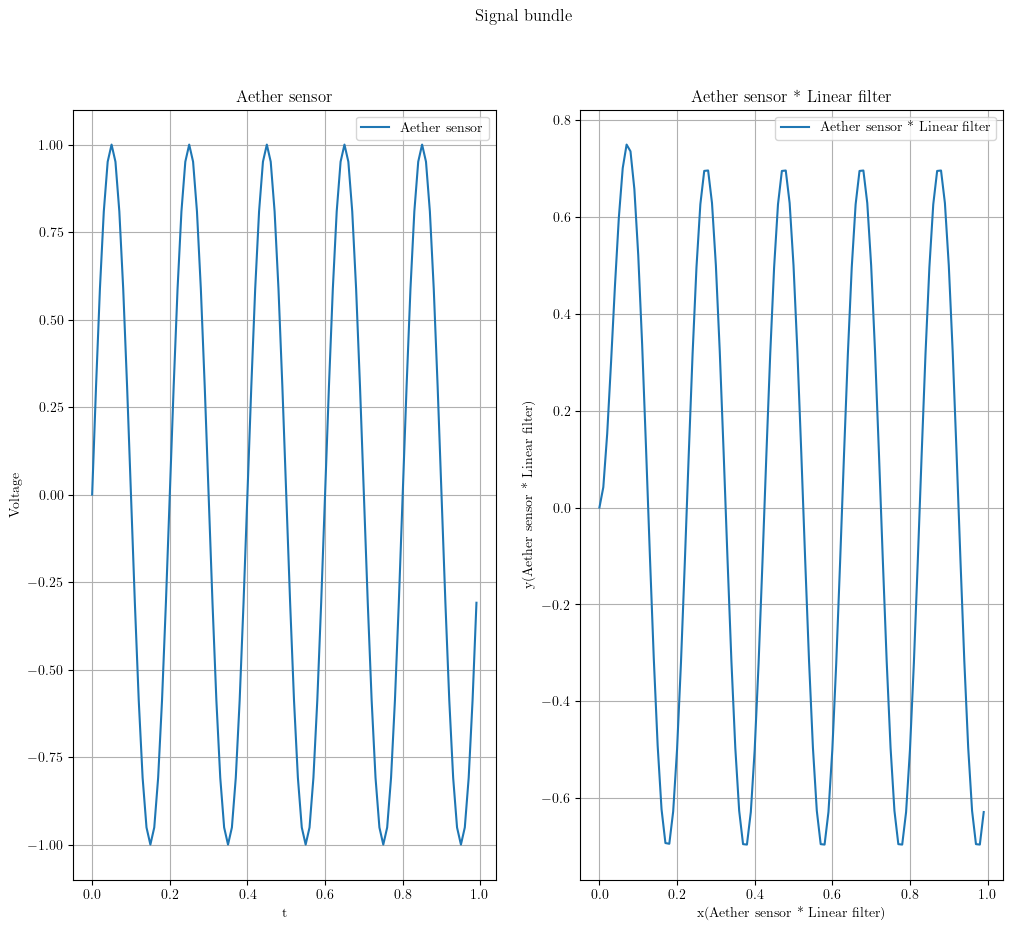

In [18]:
sb.plot(
    all_in_one=False,
    x_display_unit=u.ms,
    y_display_unit=u.volt,
    x_label="Time ()",
    y_label="Voltage",
    suptitle="Signal bundle",
)